### Loading the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### Loading the dataset

In [2]:
data_train=pd.read_excel('Data_Train.xlsx')
data_test=pd.read_excel('Test_set.xlsx')
data_submission=pd.read_excel('Sample_submission.xlsx')

In [3]:
data_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
data_submission.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


## EDA

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [8]:
data_train.describe(include=object).T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


#### Visualization

In [9]:
data_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

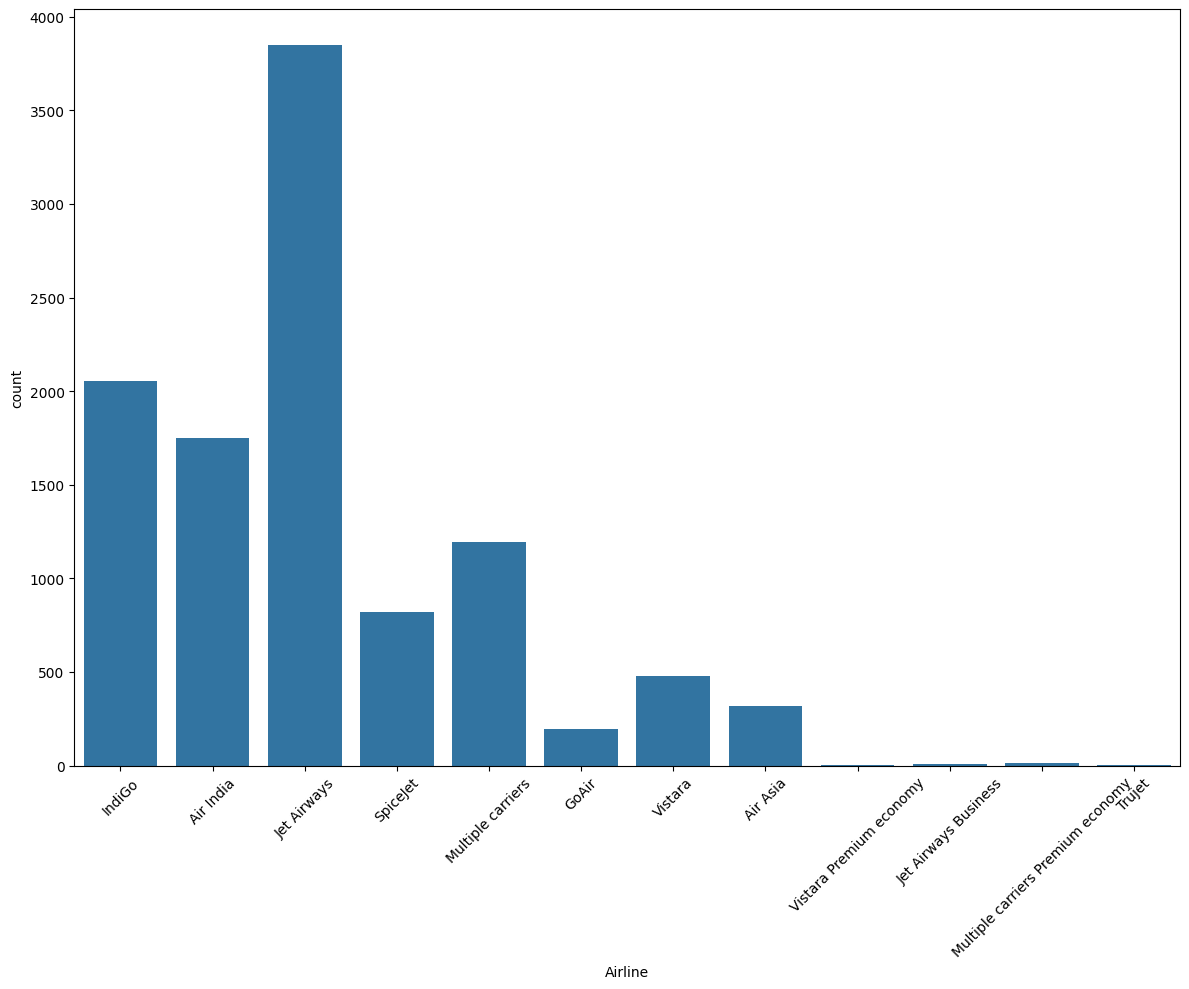

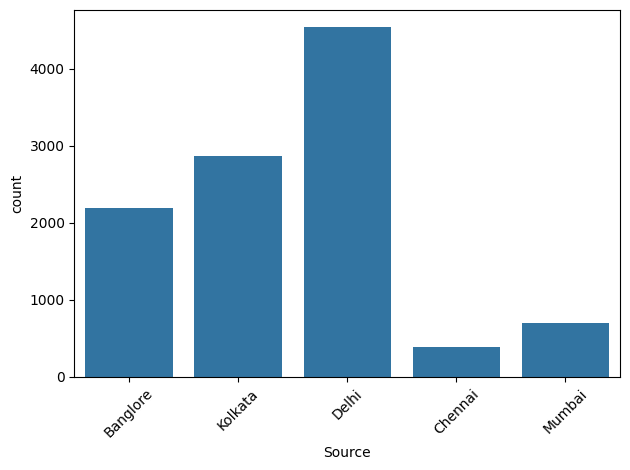

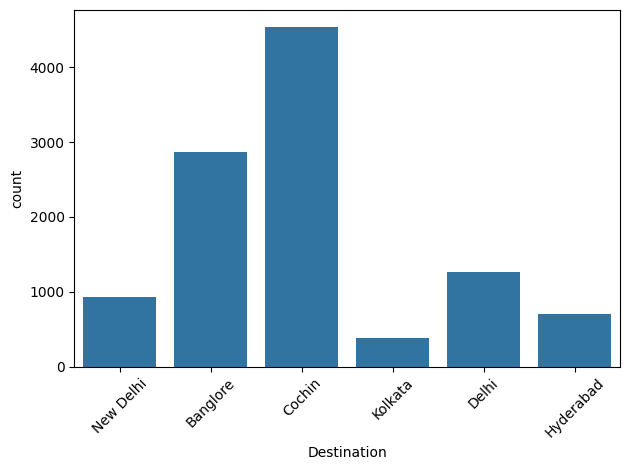

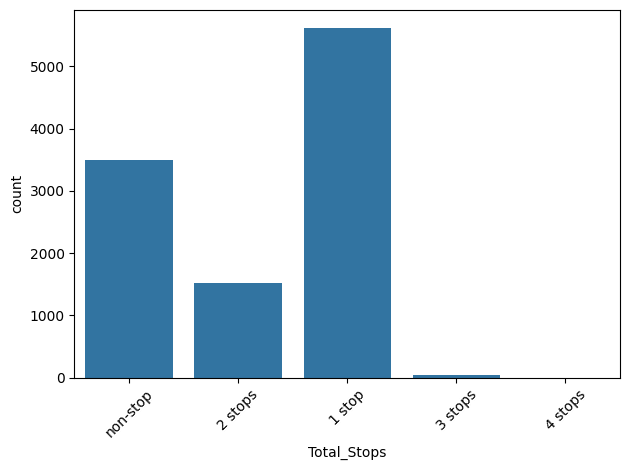

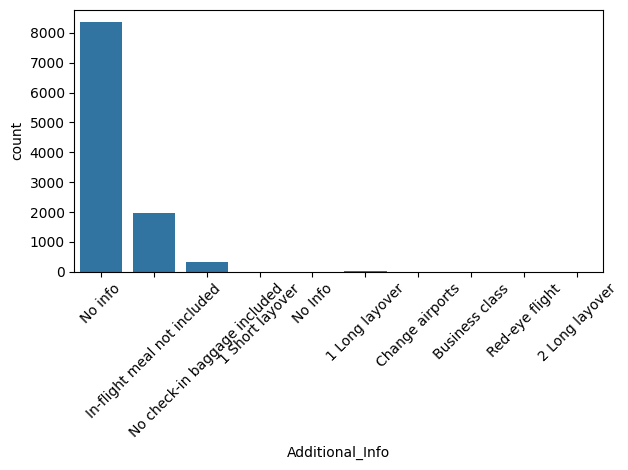

In [10]:
plt.figure(figsize=(12,10))
for i in ['Airline','Source','Destination','Total_Stops','Additional_Info']:
    sns.countplot(x=data_train[i],)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [11]:
# lets explore routes
data_train['Route'].value_counts().head(5).sum()

np.int64(6252)

In [12]:
6252/data_train.shape[0]

0.5852288682954226

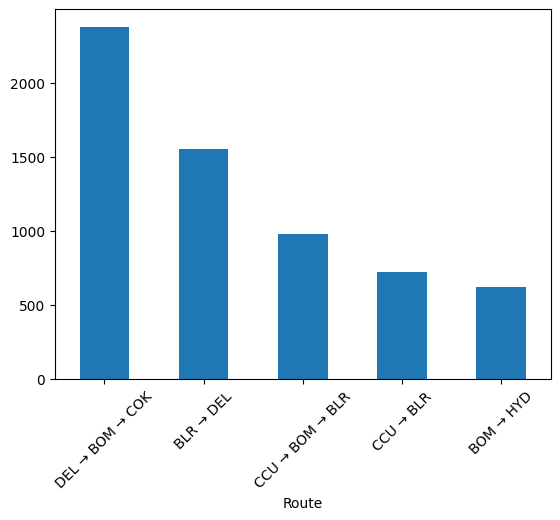

In [13]:
data_train['Route'].value_counts().head(5).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

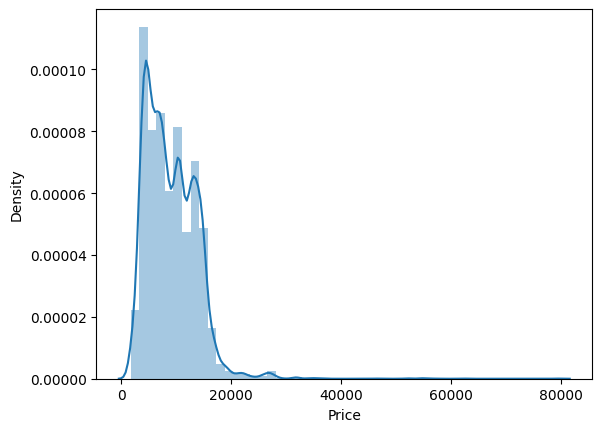

In [14]:
# Lets explore price column
sns.distplot(data_train['Price'])
plt.show()

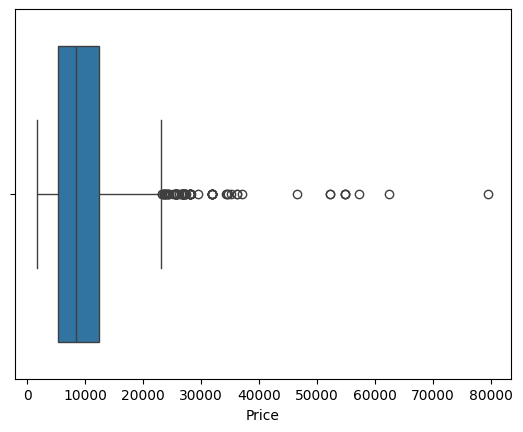

In [15]:
sns.boxplot(data_train['Price'],orient='h')
plt.show()

Inferences:
1. There is one data missing in route and total stops
2. Out of 12 unique airlines Jet Airways is the most frequent
3. For most of the airlines source is Delhi and destination is Cochin
4. Most frequnt route is DEL->BOM->COK
5. Most of the flights have 1 stop

Key Observations:
1. There is duplicate category in destination Delhi and New Delhi
2. There is duplicate category in Additional info, No_info and No_Info
3. Top 3 Airlines: Jet Airways > Indigo > Air India
4. Top 5 routes have ~60% of data

#### Bi-Variate Analysis

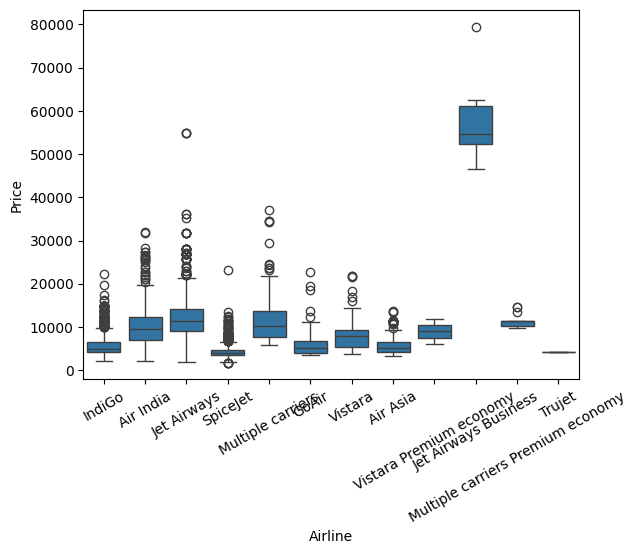

In [16]:
# Lets explore effect of airline on price

sns.boxplot(x=data_train['Airline'],y=data_train['Price'])
plt.xticks(rotation=30)
plt.show()

In [17]:
# Airline Vs Price (ANOVA, Kruskal-Wallis)

In [18]:
from scipy.stats import shapiro,jarque_bera,kruskal

In [19]:
# Assumption 1: The data comes from normal distribution

# Ho: Data is normal
# Ha: Data is not normal

shapiro(data_train['Price'])

ShapiroResult(statistic=np.float64(0.8955879270329227), pvalue=np.float64(1.5116289695144164e-64))

In [20]:
jarque_bera(data_train['Price'])

SignificanceResult(statistic=np.float64(84545.14317610116), pvalue=np.float64(0.0))

In [21]:
# P value < 0.05. Reject Ho.
# Data is not normal

In [22]:
data_train['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [23]:
# We have to go with non-parametric test i.e. Kruskal-Wallis

# Ho: Airline has no effect on Price
# Ha: Atlest one Airline has different Price
    
s1 = data_train[data_train['Airline']=='IndiGo']['Price']
s2 = data_train[data_train['Airline']=='Jet Airways']['Price']
s3 = data_train[data_train['Airline']=='Air India']['Price']
s4 = data_train[data_train['Airline']=='Multiple carriers']['Price']
s5 = data_train[data_train['Airline']=='SpiceJet']['Price']
s6 = data_train[data_train['Airline']=='Vistara']['Price']
s7 = data_train[data_train['Airline']=='Air Asia']['Price']
s8 = data_train[data_train['Airline']=='GoAir']['Price']
s9 = data_train[data_train['Airline']=='Multiple carriers Premium economy']['Price']
s10 = data_train[data_train['Airline']=='Jet Airways Business']['Price']
s11 = data_train[data_train['Airline']=='Vistara Premium economy']['Price']
s12 = data_train[data_train['Airline']=='Trujet']['Price']


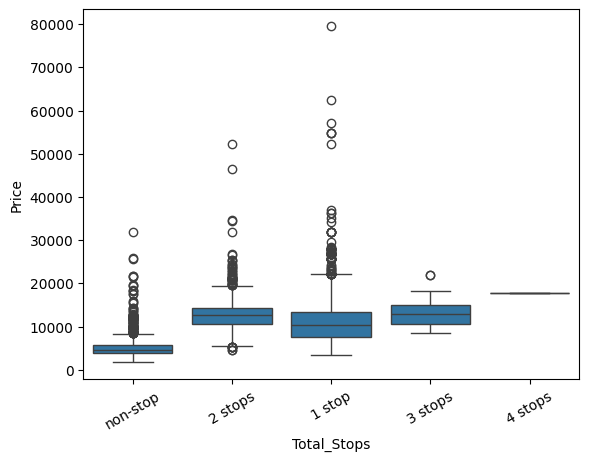

In [24]:
# Lets explore effect of airline on price

sns.boxplot(x=data_train['Total_Stops'],y=data_train['Price'])
plt.xticks(rotation=30)
plt.show()

In [25]:
# Lets prove this fact statistically

# Ho: Total stops has no effect on Price
# Ha: Atleast one stop has effect on price

In [26]:
data_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [27]:
sample=[]
for i in ['non-stop', '2 stops', '1 stop', '3 stops']:
    s=data_train[data_train['Total_Stops']==i]['Price']
    sample.append(s)

In [28]:
kruskal(sample[0],sample[1],sample[2],sample[3])

KruskalResult(statistic=np.float64(5749.236822864575), pvalue=np.float64(0.0))

Inference:
1. Flight price is affected by Airline and Total stops

## Data Preprocessing

In [29]:
# Combine the datasets
data = pd.concat([data_train,data_test])

In [30]:
# Treat missing values
data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [31]:
data[(data['Route'].isnull())|(data['Total_Stops'].isnull())]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [32]:
# This is just one row, so we can drop it.
data.drop(index=[9039],inplace=True)

In [33]:
data['Price'].max()

np.float64(79512.0)

In [34]:
data[data['Price']==data['Price'].max()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512.0


In [35]:
data[data['Airline']=='Jet Airways Business']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
657,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,52229.0
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512.0
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427.0
7351,Jet Airways Business,3/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,8h 20m,2 stops,No info,46490.0
9715,Jet Airways Business,6/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No info,52285.0
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209.0
1802,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,13:15,7h 30m,1 stop,Business class,NaN
1819,Jet Airways Business,03/03/2019,Banglore,New Delhi,BLR → DEL,19:55,22:35,2h 40m,non-stop,No info,NaN


In [36]:
data['Price'].median()

np.float64(8372.0)

In [37]:
# Treat the outliers 

# There are outliers in Price, but we decide to keep that data as it seems to be a genuine data.

## Feature Engineering

* Generate some new features using existing ones.
* Encoding category columns

In [38]:
# Airline

In [39]:
data['Airline'].value_counts()

Airline
Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: count, dtype: int64

In [40]:
data_train['Airline'].value_counts(normalize=True)

Airline
Jet Airways                          0.360292
IndiGo                               0.192174
Air India                            0.163999
Multiple carriers                    0.111954
SpiceJet                             0.076570
Vistara                              0.044838
Air Asia                             0.029861
GoAir                                0.018160
Multiple carriers Premium economy    0.001217
Jet Airways Business                 0.000562
Vistara Premium economy              0.000281
Trujet                               0.000094
Name: proportion, dtype: float64

In [41]:
airline_map = data_train['Airline'].value_counts(normalize=True).to_dict()

In [42]:
airline_map

{'Jet Airways': 0.36029205279415893,
 'IndiGo': 0.192174482823177,
 'Air India': 0.16399887672002247,
 'Multiple carriers': 0.1119535710942619,
 'SpiceJet': 0.0765702518019283,
 'Vistara': 0.04483759243658148,
 'Air Asia': 0.029860526069456144,
 'GoAir': 0.018159692970139474,
 'Multiple carriers Premium economy': 0.0012168866423289339,
 'Jet Airways Business': 0.0005616399887672002,
 'Vistara Premium economy': 0.0002808199943836001,
 'Trujet': 9.360666479453337e-05}

In [43]:
data['Airline'] = data['Airline'].map(airline_map)

In [44]:
data['Airline'].value_counts()

Airline
0.360292    4746
0.192174    2564
0.163999    2191
0.111954    1543
0.076570    1026
0.044838     608
0.029861     405
0.018160     240
0.001217      16
0.000562       8
0.000281       5
0.000094       1
Name: count, dtype: int64

In [45]:
# Date of Journey

data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'],format='%d/%m/%Y')

In [46]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0.192174,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,0.163999,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,0.360292,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,0.192174,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,0.192174,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [47]:
data['Day_of_Journey']=data['Date_of_Journey'].dt.day

data['Month_of_Journey']=data['Date_of_Journey'].dt.month

data['Weekday_of_Journey']=data['Date_of_Journey'].dt.weekday

In [48]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey
0,0.192174,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6
1,0.163999,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2
2,0.360292,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,6
3,0.192174,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,6
4,0.192174,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,4


In [49]:
data.drop(columns='Date_of_Journey',inplace=True)

In [50]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey
0,0.192174,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6
1,0.163999,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2
2,0.360292,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,6
3,0.192174,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,6
4,0.192174,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,4


In [51]:
# Source and Destination

In [52]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [53]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [54]:
data['Source'].value_counts()

Source
Delhi       5681
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: count, dtype: int64

In [55]:
data['Destination'].value_counts()

Destination
Cochin       5681
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: count, dtype: int64

In [56]:
data['Destination']=data['Destination'].replace('New Delhi','Delhi')

In [57]:
data['Destination'].value_counts()

Destination
Cochin       5681
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: count, dtype: int64

In [58]:
data['Source_to_Destination']=data['Source']+'-'+data['Destination']

In [59]:
data['Source_to_Destination'].value_counts()

Source_to_Destination
Delhi-Cochin        5681
Kolkata-Banglore    3581
Banglore-Delhi      2752
Mumbai-Hyderabad     883
Chennai-Kolkata      456
Name: count, dtype: int64

In [60]:
sd_map=data[data['Price'].notnull()]['Source_to_Destination'].value_counts(normalize=True).to_dict()

In [61]:
sd_map

{'Delhi-Cochin': 0.42463958060288337,
 'Kolkata-Banglore': 0.2687698932784123,
 'Banglore-Delhi': 0.20567309492604383,
 'Mumbai-Hyderabad': 0.06524995319228609,
 'Chennai-Kolkata': 0.03566747800037446}

In [62]:
data['Source_to_Destination']=data['Source_to_Destination'].map(sd_map)

In [63]:
data['Source_to_Destination'].value_counts()

Source_to_Destination
0.424640    5681
0.268770    3581
0.205673    2752
0.065250     883
0.035667     456
Name: count, dtype: int64

In [64]:
data.drop(columns=['Source','Destination'],inplace=True)

In [65]:
# Route

In [66]:
busy_routes=data_train['Route'].value_counts().head(5).index

In [67]:
busy_routes

Index(['DEL → BOM → COK', 'BLR → DEL', 'CCU → BOM → BLR', 'CCU → BLR',
       'BOM → HYD'],
      dtype='object', name='Route')

In [68]:
data['Route']=data['Route'].apply(lambda r:1 if r in busy_routes else 0)

In [69]:
data.head()

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,1,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,0,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770
2,0.360292,0,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,6,0.424640
3,0.192174,0,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,6,0.268770
4,0.192174,0,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,4,0.205673


In [70]:
# Dep Time & Arrival Time

In [71]:
data['Dep_Time']=data['Dep_Time'].str.split(':',expand=True)[0].astype(int)

In [72]:
data['Arrival_Time']=data['Arrival_Time'].str.split(':',expand=True)[0].astype(int)

In [73]:
data.head()

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,1,22,1,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,0,5,13,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770
2,0.360292,0,9,4,19h,2 stops,No info,13882.0,9,6,6,0.424640
3,0.192174,0,18,23,5h 25m,1 stop,No info,6218.0,12,5,6,0.268770
4,0.192174,0,16,21,4h 45m,1 stop,No info,13302.0,1,3,4,0.205673


In [74]:
def hr_to_cat(h):
    if h<=4:
        return 5
    elif h<=8:
        return 0
    elif h<=12:
        return 1
    elif h<=16:
        return 2
    elif h<=20:
        return 3
    else:
        return 4

In [75]:
data['Dep_Time']=data['Dep_Time'].apply(hr_to_cat)
data['Arrival_Time']=data['Arrival_Time'].apply(hr_to_cat)

In [76]:
data.head()

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,1,4,5,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,0,0,2,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770
2,0.360292,0,1,5,19h,2 stops,No info,13882.0,9,6,6,0.424640
3,0.192174,0,3,4,5h 25m,1 stop,No info,6218.0,12,5,6,0.268770
4,0.192174,0,2,4,4h 45m,1 stop,No info,13302.0,1,3,4,0.205673


In [77]:
# Duration

data[['Dur_h','Dur_m']]=data['Duration'].str.split(expand=True)

In [78]:
data['Dur_m'].fillna('0m',inplace=True)

In [79]:
data['Dur_h']=data['Dur_h'].str.rstrip('hm').astype(int)

In [80]:
data['Dur_m']=data['Dur_m'].str.rstrip('m').astype(int)

In [81]:
data['Duration']=data['Dur_h']*60+data['Dur_m']

In [82]:
data

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination,Dur_h,Dur_m
0,0.192174,1,4,5,170,non-stop,No info,3897.0,24,3,6,0.205673,2,50
1,0.163999,0,0,2,445,2 stops,No info,7662.0,1,5,2,0.268770,7,25
2,0.360292,0,1,5,1140,2 stops,No info,13882.0,9,6,6,0.424640,19,0
3,0.192174,0,3,4,325,1 stop,No info,6218.0,12,5,6,0.268770,5,25
4,0.192174,0,2,4,285,1 stop,No info,13302.0,1,3,4,0.205673,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0.163999,0,3,3,1435,1 stop,No info,NaN,6,6,3,0.268770,23,55
2667,0.192174,1,2,2,155,non-stop,No info,NaN,27,3,2,0.268770,2,35
2668,0.360292,1,4,5,395,1 stop,No info,NaN,6,3,2,0.424640,6,35
2669,0.163999,1,5,3,915,1 stop,No info,NaN,6,3,2,0.424640,15,15


In [83]:
data.drop(columns=['Dur_h','Dur_m'],inplace=True)

In [84]:
data

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,1,4,5,170,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,0,0,2,445,2 stops,No info,7662.0,1,5,2,0.268770
2,0.360292,0,1,5,1140,2 stops,No info,13882.0,9,6,6,0.424640
3,0.192174,0,3,4,325,1 stop,No info,6218.0,12,5,6,0.268770
4,0.192174,0,2,4,285,1 stop,No info,13302.0,1,3,4,0.205673
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0.163999,0,3,3,1435,1 stop,No info,NaN,6,6,3,0.268770
2667,0.192174,1,2,2,155,non-stop,No info,NaN,27,3,2,0.268770
2668,0.360292,1,4,5,395,1 stop,No info,NaN,6,3,2,0.424640
2669,0.163999,1,5,3,915,1 stop,No info,NaN,6,3,2,0.424640


In [85]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         10492
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: count, dtype: int64

In [86]:
# Total Stops

In [87]:
data['Total_Stops'] = data['Total_Stops'].str.split(expand=True)[0]

In [88]:
data['Total_Stops'] = np.where(data['Total_Stops']=='non-stop','0',data['Total_Stops'])

In [89]:
data['Total_Stops']= data['Total_Stops'].astype(int)

In [90]:
data['Total_Stops'].value_counts()

Total_Stops
1    7056
0    4340
2    1899
3      56
4       2
Name: count, dtype: int64

In [91]:
# Additional Info

In [92]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         10492
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: count, dtype: int64

In [93]:
data['Additional_Info'] = data['Additional_Info'].apply(lambda info: 0 if info in ['No info','No Info'] else 1)

In [94]:
# Final Data

In [95]:
data.head(10)

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,1,4,5,170,0,0,3897.0,24,3,6,0.205673
1,0.163999,0,0,2,445,2,0,7662.0,1,5,2,0.268770
2,0.360292,0,1,5,1140,2,0,13882.0,9,6,6,0.424640
3,0.192174,0,3,4,325,1,0,6218.0,12,5,6,0.268770
4,0.192174,0,2,4,285,1,0,13302.0,1,3,4,0.205673
5,0.076570,1,1,1,145,0,0,3873.0,24,6,0,0.268770
6,0.360292,0,3,1,930,1,1,11087.0,12,3,1,0.205673
7,0.360292,0,0,0,1265,1,0,22270.0,1,3,4,0.205673
8,0.360292,0,0,1,1530,1,1,11087.0,12,3,1,0.205673
9,0.111954,1,1,3,470,1,0,8625.0,27,5,0,0.424640


In [96]:
data['Total_Stops'].value_counts()

Total_Stops
1    7056
0    4340
2    1899
3      56
4       2
Name: count, dtype: int64

## Train Test Split

In [97]:
train_set=data[data['Price'].notnull()]
test_set=data[data['Price'].isnull()]

In [98]:
test_set.drop(columns='Price',inplace=True)

In [99]:
# Train test split in train_set

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
y=train_set['Price']
x=train_set.drop(columns='Price')

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2)

In [103]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8545, 11) (2137, 11) (8545,) (2137,)


## Predictive Modelling

In [104]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor

from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_squared_error

In [105]:
# Scoring parameter

# 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())

In [106]:
def hack_eval(y_true,y_pred):
    scor=1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())
    return scor

In [107]:
r2=[]
ms_error=[]
rms_error=[]
map_error=[]
fit_model=[]
hack_score=[]

def model_eval(model,xtrain,ytrain,xtest,ytest):
    m=model
    m.fit(xtrain,ytrain)
    pred=m.predict(xtest)
    
    print(f'R2: {r2_score(ytest,pred)}')
    print(f'MSE: {mean_squared_error(ytest,pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(ytest,pred))}')
    print(f'MAPE: {mean_absolute_percentage_error(ytest,pred)}')
    print(f'Hack Score: {hack_eval(ytest,pred)}')
    
    
    inp=input('Do you want to save this model? Y/N')
    if inp.lower()=='y':
        fit_model.append(str(m))
        r2.append(r2_score(ytest,pred))
        ms_error.append(mean_squared_error(ytest,pred))
        rms_error.append(np.sqrt(mean_squared_error(ytest,pred)))
        map_error.append(mean_absolute_percentage_error(ytest,pred))
        hack_score.append(hack_eval(ytest,pred))
        
        global score_card
        score_card=pd.DataFrame({'Model':fit_model,
                                'R2':r2,
                                'MSE':ms_error,
                                'RMSE':rms_error,
                                'MAPE':map_error,
                                'Hackathon Score':hack_score})
    else:
        return

### Linear Regression

In [108]:
model_eval(LinearRegression(),x_train,y_train,x_test,y_test)

R2: 0.49605673287692054
MSE: 11209267.615819253
RMSE: 3348.0244347703397
MAPE: 0.2717233415748326
Hack Score: 0.8522775848215713


Do you want to save this model? Y/N Y


In [109]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278


### Ridge and Lasso

In [110]:
model_eval(Ridge(alpha=1),x_train,y_train,x_test,y_test)

R2: 0.4960080572805615
MSE: 11210350.312665394
RMSE: 3348.1861227633976
MAPE: 0.27161466374415366
Hack Score: 0.8335352336410451


Do you want to save this model? Y/N Y


In [111]:
model_eval(Lasso(alpha=1),x_train,y_train,x_test,y_test)

R2: 0.49608915179655044
MSE: 11208546.518089302
RMSE: 3347.9167430044167
MAPE: 0.27164738612046074
Hack Score: 0.8394217804956311


Do you want to save this model? Y/N Y


In [112]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Ridge(alpha=1),0.496008,1.121035e+07,3348.186123,0.271615,0.833535
2,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422


### Decision Tree

In [113]:
model_eval(DecisionTreeRegressor(max_depth=9),x_train,y_train,x_test,y_test)

R2: 0.7850005980311293
MSE: 4782256.240208028
RMSE: 2186.8370401582347
MAPE: 0.12757292927281086
Hack Score: 0.9180314959774766


Do you want to save this model? Y/N Y


In [114]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Ridge(alpha=1),0.496008,1.121035e+07,3348.186123,0.271615,0.833535
2,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
3,DecisionTreeRegressor(max_depth=9),0.785001,4.782256e+06,2186.837040,0.127573,0.918031


### Random Forest

In [115]:
model_eval(RandomForestRegressor(max_depth=10),x_train,y_train,x_test,y_test)

R2: 0.8430008325521129
MSE: 3492150.4030221985
RMSE: 1868.729622771095
MAPE: 0.1003698919845232
Hack Score: 0.9334913715097038


Do you want to save this model? Y/N Y


In [116]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Ridge(alpha=1),0.496008,1.121035e+07,3348.186123,0.271615,0.833535
2,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
3,DecisionTreeRegressor(max_depth=9),0.785001,4.782256e+06,2186.837040,0.127573,0.918031
4,RandomForestRegressor(max_depth=10),0.843001,3.492150e+06,1868.729623,0.100370,0.933491


### ADABoost

In [117]:
model_eval(AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=3),n_estimators=150),x_train,y_train,x_test,y_test)

R2: 0.35300473065445304
MSE: 14391189.630661413
RMSE: 3793.572146494833
MAPE: 0.4320076820553159
Hack Score: 0.8173794407862461


Do you want to save this model? Y/N Y


In [118]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Ridge(alpha=1),0.496008,1.121035e+07,3348.186123,0.271615,0.833535
2,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
3,DecisionTreeRegressor(max_depth=9),0.785001,4.782256e+06,2186.837040,0.127573,0.918031
4,RandomForestRegressor(max_depth=10),0.843001,3.492150e+06,1868.729623,0.100370,0.933491
5,AdaBoostRegressor(estimator=RandomForestRegres...,0.353005,1.439119e+07,3793.572146,0.432008,0.817379


### Gradient Boosting

In [119]:
model_eval(GradientBoostingRegressor(max_depth=7,n_estimators=150),x_train,y_train,x_test,y_test)

R2: 0.8829387618324059
MSE: 2603806.4831199376
RMSE: 1613.6314582704247
MAPE: 0.0891783618163004
Hack Score: 0.9410023265717591


Do you want to save this model? Y/N Y


In [120]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Ridge(alpha=1),0.496008,1.121035e+07,3348.186123,0.271615,0.833535
2,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
3,DecisionTreeRegressor(max_depth=9),0.785001,4.782256e+06,2186.837040,0.127573,0.918031
4,RandomForestRegressor(max_depth=10),0.843001,3.492150e+06,1868.729623,0.100370,0.933491
5,AdaBoostRegressor(estimator=RandomForestRegres...,0.353005,1.439119e+07,3793.572146,0.432008,0.817379
6,"GradientBoostingRegressor(max_depth=7, n_estim...",0.882939,2.603806e+06,1613.631458,0.089178,0.941002


### XGBoost

In [121]:
model_eval(XGBRegressor(n_estimators=150,max_depth=7),x_train,y_train,x_test,y_test)

R2: 0.8929025701480908
MSE: 2382180.3573839255
RMSE: 1543.4313581704648
MAPE: 0.08458004197057599
Hack Score: 0.9411570112007358


Do you want to save this model? Y/N Y


In [122]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Ridge(alpha=1),0.496008,1.121035e+07,3348.186123,0.271615,0.833535
2,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
3,DecisionTreeRegressor(max_depth=9),0.785001,4.782256e+06,2186.837040,0.127573,0.918031
4,RandomForestRegressor(max_depth=10),0.843001,3.492150e+06,1868.729623,0.100370,0.933491
5,AdaBoostRegressor(estimator=RandomForestRegres...,0.353005,1.439119e+07,3793.572146,0.432008,0.817379
6,"GradientBoostingRegressor(max_depth=7, n_estim...",0.882939,2.603806e+06,1613.631458,0.089178,0.941002
7,"XGBRegressor(base_score=None, booster=None, ca...",0.892903,2.382180e+06,1543.431358,0.084580,0.941157


### Voting

In [123]:
base_models=[('DT',DecisionTreeRegressor(max_depth=9)),
            ('RF',RandomForestRegressor(max_depth=10)),
            ('GBR',GradientBoostingRegressor(max_depth=7,n_estimators=150)),
            ('XGBR',XGBRegressor(max_depth=7,n_estimators=150))]

In [124]:
model_eval(VotingRegressor(base_models),x_train,y_train,x_test,y_test)

R2: 0.8728727654013553
MSE: 2827705.5907708216
RMSE: 1681.5783034907479
MAPE: 0.09279739943305332
Hack Score: 0.9388706263909814


Do you want to save this model? Y/N Y


In [125]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Ridge(alpha=1),0.496008,1.121035e+07,3348.186123,0.271615,0.833535
2,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
3,DecisionTreeRegressor(max_depth=9),0.785001,4.782256e+06,2186.837040,0.127573,0.918031
4,RandomForestRegressor(max_depth=10),0.843001,3.492150e+06,1868.729623,0.100370,0.933491
5,AdaBoostRegressor(estimator=RandomForestRegres...,0.353005,1.439119e+07,3793.572146,0.432008,0.817379
6,"GradientBoostingRegressor(max_depth=7, n_estim...",0.882939,2.603806e+06,1613.631458,0.089178,0.941002
7,"XGBRegressor(base_score=None, booster=None, ca...",0.892903,2.382180e+06,1543.431358,0.084580,0.941157
8,"VotingRegressor(estimators=[('DT', DecisionTre...",0.872873,2.827706e+06,1681.578303,0.092797,0.938871


### Stacking

In [126]:
base_models=[('DT1',DecisionTreeRegressor(max_depth=9)),
            ('DT2',DecisionTreeRegressor(max_depth=10)),
            ('RF1',RandomForestRegressor(max_depth=9,n_estimators=130)),
            ('RF2',RandomForestRegressor(max_depth=7,n_estimators=150)),
            ('GBR',GradientBoostingRegressor(max_depth=7,n_estimators=150)),
            ('XGBR',XGBRegressor(max_depth=7,n_estimators=150))]

In [127]:
model_eval(StackingRegressor(base_models),x_train,y_train,x_test,y_test)

R2: 0.8896969260435021
MSE: 2453483.8651270517
RMSE: 1566.3600687986948
MAPE: 0.08498459302105958
Hack Score: 0.9423227970975062


Do you want to save this model? Y/N Y


In [128]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Ridge(alpha=1),0.496008,1.121035e+07,3348.186123,0.271615,0.833535
2,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
3,DecisionTreeRegressor(max_depth=9),0.785001,4.782256e+06,2186.837040,0.127573,0.918031
4,RandomForestRegressor(max_depth=10),0.843001,3.492150e+06,1868.729623,0.100370,0.933491
5,AdaBoostRegressor(estimator=RandomForestRegres...,0.353005,1.439119e+07,3793.572146,0.432008,0.817379
6,"GradientBoostingRegressor(max_depth=7, n_estim...",0.882939,2.603806e+06,1613.631458,0.089178,0.941002
7,"XGBRegressor(base_score=None, booster=None, ca...",0.892903,2.382180e+06,1543.431358,0.084580,0.941157
8,"VotingRegressor(estimators=[('DT', DecisionTre...",0.872873,2.827706e+06,1681.578303,0.092797,0.938871
9,"StackingRegressor(estimators=[('DT1', Decision...",0.889697,2.453484e+06,1566.360069,0.084985,0.942323


### Tuning XGBoost

In [129]:
param={'n_estimators':[100,130,150,175,200],
      'max_depth':[7,9,10,12,15],
      'gamma':[0,1,2]}

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
gscv=GridSearchCV(estimator=XGBRegressor(),param_grid=param,scoring='r2',verbose=3,
                 cv=5)

In [132]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END gamma=0, max_depth=7, n_estimators=100;, score=0.864 total time=   0.1s
[CV 2/5] END gamma=0, max_depth=7, n_estimators=100;, score=0.869 total time=   0.1s
[CV 3/5] END gamma=0, max_depth=7, n_estimators=100;, score=0.884 total time=   0.1s
[CV 4/5] END gamma=0, max_depth=7, n_estimators=100;, score=0.850 total time=   0.1s
[CV 5/5] END gamma=0, max_depth=7, n_estimators=100;, score=0.888 total time=   0.1s
[CV 1/5] END gamma=0, max_depth=7, n_estimators=130;, score=0.864 total time=   0.1s
[CV 2/5] END gamma=0, max_depth=7, n_estimators=130;, score=0.869 total time=   0.2s
[CV 3/5] END gamma=0, max_depth=7, n_estimators=130;, score=0.883 total time=   0.1s
[CV 4/5] END gamma=0, max_depth=7, n_estimators=130;, score=0.848 total time=   0.2s
[CV 5/5] END gamma=0, max_depth=7, n_estimators=130;, score=0.887 total time=   0.1s
[CV 1/5] END gamma=0, max_depth=7, n_estimators=150;, score=0.863 total time=   0.2s
[CV

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'gamma': [0, 1, 2], 'max_depth': [7, 9, 10, 12, 15],
                         'n_estimators': [100, 130, 150, 175, 200]},
             scoring='r2', verbose=3)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'gamma': [0, 1, 2], 'max_depth': [7, 9, 10, 12, 15],
                         'n_estimators': [100, 130, 150, 175, 200]},
             scoring='r2', verbose=3)

In [133]:
gscv.best_score_

np.float64(0.8846321555036258)

In [134]:
gscv.best_params_

{'gamma': 1, 'max_depth': 9, 'n_estimators': 100}

In [135]:
model_eval(XGBRegressor(max_depth=9,gamma=1,n_estimators=100),x_train,y_train,x_test,y_test)

R2: 0.8842139522294941
MSE: 2575442.2775543286
RMSE: 1604.8184562604981
MAPE: 0.08145062168126169
Hack Score: 0.940539890361854


Do you want to save this model? Y/N Y


### Tuning Random Forest

In [136]:
param={'n_estimators':[120,150,170,200],
      'max_depth':[7,9,10,11,12]}

In [137]:
gscv=GridSearchCV(estimator=RandomForestRegressor(),param_grid=param,scoring='r2',verbose=3,
                 cv=5)

In [138]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .....max_depth=7, n_estimators=120;, score=0.805 total time=   0.8s
[CV 2/5] END .....max_depth=7, n_estimators=120;, score=0.832 total time=   0.7s
[CV 3/5] END .....max_depth=7, n_estimators=120;, score=0.817 total time=   0.7s
[CV 4/5] END .....max_depth=7, n_estimators=120;, score=0.768 total time=   0.7s
[CV 5/5] END .....max_depth=7, n_estimators=120;, score=0.807 total time=   0.7s
[CV 1/5] END .....max_depth=7, n_estimators=150;, score=0.810 total time=   0.9s
[CV 2/5] END .....max_depth=7, n_estimators=150;, score=0.824 total time=   1.2s
[CV 3/5] END .....max_depth=7, n_estimators=150;, score=0.818 total time=   0.9s
[CV 4/5] END .....max_depth=7, n_estimators=150;, score=0.767 total time=   0.9s
[CV 5/5] END .....max_depth=7, n_estimators=150;, score=0.809 total time=   0.9s
[CV 1/5] END .....max_depth=7, n_estimators=170;, score=0.809 total time=   1.0s
[CV 2/5] END .....max_depth=7, n_estimators=170

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [7, 9, 10, 11, 12],
                         'n_estimators': [120, 150, 170, 200]},
             scoring='r2', verbose=3)

In [139]:
model_eval(RandomForestRegressor(**gscv.best_params_),x_train,y_train,x_test,y_test)

R2: 0.8558809313420027
MSE: 3205656.895373443
RMSE: 1790.4348341599712
MAPE: 0.08872571965231683
Hack Score: 0.9376665705994214


Do you want to save this model? Y/N Y


### Stacking Final Model

In [140]:
base_models=[('DT1',DecisionTreeRegressor(max_depth=11)),
            ('RF1',RandomForestRegressor(max_depth=11,n_estimators=170)),
            ('GBR',GradientBoostingRegressor(max_depth=9,n_estimators=130)),
            ('XGBR',XGBRegressor(max_depth=8,n_estimators=130,gamma=1))]

In [141]:
model_eval(StackingRegressor(estimators=base_models),x_train,y_train,x_test,y_test)

R2: 0.88270130992898
MSE: 2609088.152913012
RMSE: 1615.2672078987464
MAPE: 0.08000075995138022
Hack Score: 0.9425771515585067


Do you want to save this model? Y/N Y


In [142]:
final_model=StackingRegressor(estimators=base_models)

In [143]:
final_model.fit(x,y)

StackingRegressor(estimators=[('DT1', DecisionTreeRegressor(max_depth=11)),
                              ('RF1',
                               RandomForestRegressor(max_depth=11,
                                                     n_estimators=170)),
                              ('GBR',
                               GradientBoostingRegressor(max_depth=9,
                                                         n_estimators=130)),
                              ('XGBR',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_s...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=8,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=130, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [144]:
final_pred=final_model.predict(test_set)

In [145]:
final_pred

array([14265.73135995,  4243.84530575, 13017.241008  , ...,
       16755.97109174, 13450.43663242,  8168.63919911])

In [146]:
final_submission=pd.DataFrame({'Price':final_pred})

In [147]:
final_submission

,Price
0,14265.731360
1,4243.845306
2,13017.241008
3,11955.818985
4,3772.817048
...,...
2666,9616.002956
2667,4528.140050
2668,16755.971092
2669,13450.436632


In [148]:
final_submission.to_excel('final_submission.xlsx',index=False)